In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.reshape(len(x_train), 32, 32, 3)
x_test = x_test.reshape(len(x_test), 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_img = Input(shape = (32, 32, 3))


encoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(input_img)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)
encoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
encoded = MaxPooling2D((2, 2), padding = 'same')(encoded)

decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(16, (3, 3), activation = 'relu', padding = 'same')(decoded)
decoded = UpSampling2D((2, 2))(decoded)

decoded = Conv2D(3, (3, 3), activation = 'tanh', padding = 'same')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0588 - accuracy: 0.4134 - val_loss: 0.0399 - val_accuracy: 0.4229
Epoch 2/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0377 - accuracy: 0.4155 - val_loss: 0.0337 - val_accuracy: 0.4246
Epoch 3/50
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0335 - accuracy: 0.4244 - val_loss: 0.0343 - val_accuracy: 0.4438
Epoch 4/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0312 - accuracy: 0.4302 - val_loss: 0.0293 - val_accuracy: 0.4276
Epoch 5/50
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0298 - accuracy: 0.4331 - val_loss: 0.0286 - val_accuracy: 0.4241
Epoch 6/50
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0285 - accuracy: 0.4345 - val_loss: 0.0290 - val_accuracy: 0.4517
Epoch 7/50
50000/50000 [==============================] - 80s 2ms/st

In [17]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [18]:
encoded_test_data.shape

(10000, 4, 4, 8)

In [19]:
encoded_test_data = encoded_test_data.reshape(len(encoded_test_data), np.prod(encoded_test_data.shape[1:]))

In [20]:
encoded_test_data.shape

(10000, 128)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [22]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 130)

In [23]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Convolutional_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Convolutional_Encoded_Test_RTADM.csv', index = False)

In [24]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : frog


In [25]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 4


In [26]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [27]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [28]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,120,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance
29,6,frog,0.000000,0.410287,0.0,0.379959,0.000000,0.509424,0.242166,0.000000,...,1.324851,0.731033,0.0,0.244097,1.558900,2.017640,0.137200,0.000000,1.000000,0.000000
6731,6,frog,0.000000,0.443527,0.0,0.336449,0.000000,0.420702,0.001334,0.000000,...,1.193007,0.539657,0.0,0.281607,1.153913,1.670267,0.190233,0.148120,0.920821,0.079179
7006,6,frog,0.544375,0.807558,0.0,0.190341,0.171373,0.664574,0.000000,0.000000,...,1.212860,0.398420,0.0,0.307501,1.813901,1.658338,0.193657,0.061897,0.902586,0.097414
8040,2,bird,0.697893,0.841069,0.0,0.011245,0.543955,0.827173,0.000000,0.000000,...,2.006384,0.289675,0.0,0.267457,1.687457,2.547291,0.000000,0.000000,0.902489,0.097511
7365,4,deer,0.000000,0.274791,0.0,0.461860,0.000000,0.065090,0.008848,0.000000,...,1.168961,0.305727,0.0,0.504976,1.073895,1.296721,0.109206,0.025572,0.897377,0.102623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,airplane,0.000000,0.000000,0.0,1.601385,0.000000,0.000000,1.983671,0.982151,...,0.491668,0.000000,0.0,0.791792,0.000000,0.000000,2.111647,6.758101,0.138306,0.861694
3444,0,airplane,0.000000,0.000000,0.0,3.162362,0.000000,0.000000,4.071982,2.792630,...,0.377908,0.000000,0.0,0.519747,0.000000,0.000000,2.656502,8.412113,0.137963,0.862037
6222,0,airplane,0.000000,0.254721,0.0,0.628145,0.000000,0.000000,0.712530,0.842731,...,0.196279,0.000000,0.0,0.927377,0.000000,0.000000,1.873338,6.625986,0.137427,0.862573
8024,0,airplane,0.000000,0.000000,0.0,1.563756,0.000000,0.000000,1.817111,1.538309,...,0.575792,0.000000,0.0,1.190932,0.000000,0.000000,2.165050,8.243703,0.131324,0.868676


In [29]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

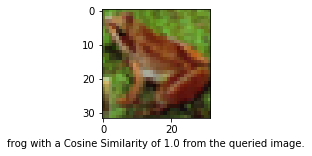

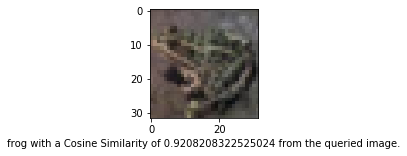

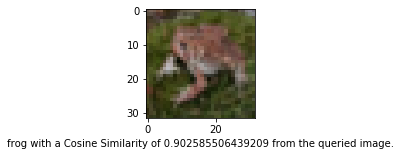

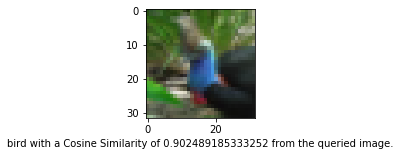

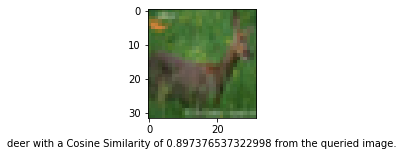

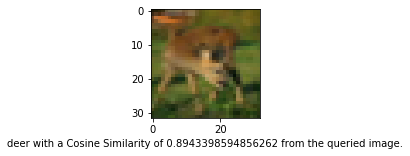

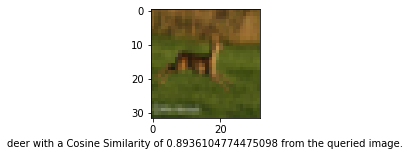

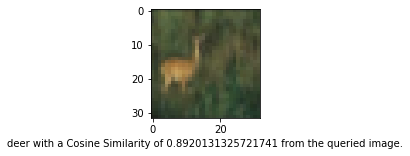

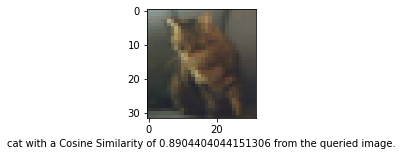

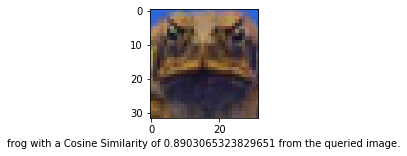

In [30]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [31]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [32]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,121,122,123,124,125,126,127,Cosine Similarity,Cosine Distance,Euclidean Distance
29,6,frog,0.000000,0.410287,0.0,0.379959,0.000000,0.509424,0.242166,0.000000,...,0.731033,0.0,0.244097,1.558900,2.017640,0.137200,0.000000,1.000000,0.000000,0.000000
6731,6,frog,0.000000,0.443527,0.0,0.336449,0.000000,0.420702,0.001334,0.000000,...,0.539657,0.0,0.281607,1.153913,1.670267,0.190233,0.148120,0.920821,0.079179,2.860381
7365,4,deer,0.000000,0.274791,0.0,0.461860,0.000000,0.065090,0.008848,0.000000,...,0.305727,0.0,0.504976,1.073895,1.296721,0.109206,0.025572,0.897377,0.102623,3.265008
9780,4,deer,0.051563,0.380578,0.0,0.132506,0.048599,0.596780,0.000000,0.000000,...,0.257046,0.0,0.428705,1.394861,1.724244,0.128287,0.000000,0.894340,0.105660,3.306382
805,4,deer,0.379819,0.591728,0.0,0.002508,0.225656,0.708691,0.000000,0.000000,...,0.262890,0.0,0.321098,1.172603,1.483740,0.219645,0.000000,0.893610,0.106390,3.317847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,8,ship,0.000000,0.000000,0.0,3.211391,0.000000,0.000000,4.111693,2.770878,...,0.000000,0.0,0.872115,0.000000,0.000000,2.725407,8.108610,0.143771,0.856229,29.689808
8903,0,airplane,0.000000,0.000000,0.0,3.210254,0.000000,0.000000,4.108576,2.770312,...,0.000000,0.0,1.665298,0.000000,0.000000,3.000709,7.729270,0.164166,0.835834,29.943702
3823,0,airplane,0.000000,0.000000,0.0,3.199090,0.000000,0.000000,4.094171,2.755037,...,0.000000,0.0,1.747317,0.000000,0.000000,3.176646,7.923416,0.196756,0.803244,30.288125
7803,0,airplane,0.000000,0.000000,0.0,3.195091,0.000000,0.000000,4.098159,2.732496,...,0.000000,0.0,1.609780,0.000000,0.000000,2.583316,8.489861,0.184080,0.815920,30.785011


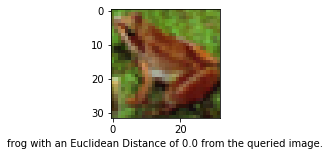

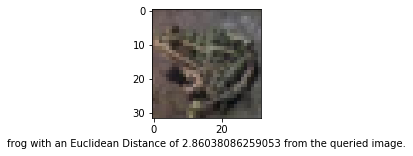

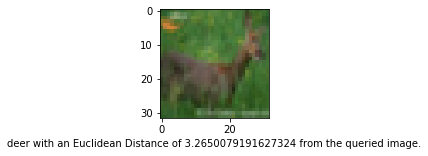

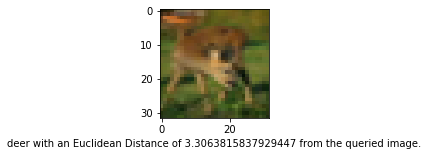

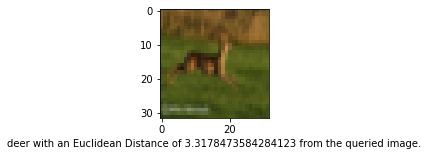

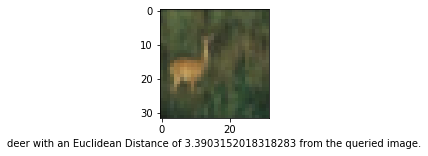

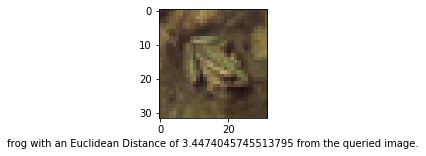

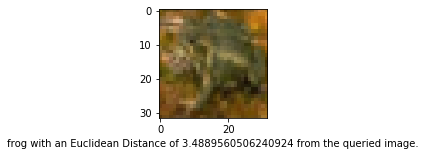

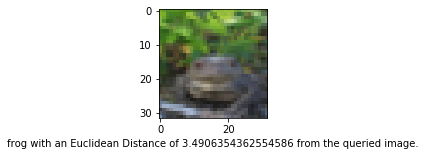

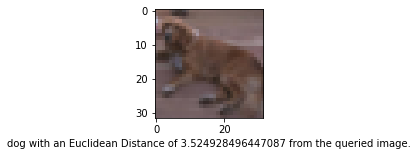

In [33]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()